**Pregunta 1:** Utilice yfinance para extraer datos bursátiles

In [1]:
import yfinance as yf

# Descargar datos de Tesla
tesla_stock = yf.Ticker("TSLA")
tesla_data = tesla_stock.history(period="max")  # Historial completo
tesla_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


**Pregunta 2:** Extracción de datos de ingresos de Tesla utilizando Webscraping

In [2]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 Safari/537.36"
}
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.content, "html.parser")
table = soup.find("table", {"class": "historical_data_table"})
if table:
    rows = table.find_all("tr")

    tesla_revenue = []
    for row in rows[1:]:
        cols = row.find_all("td")
        if len(cols) > 1:
            date = cols[0].text.strip()
            revenue = cols[1].text.strip().replace("$", "").replace(",", "")
            if revenue != "":
                tesla_revenue.append({"Date": date, "Revenue": float(revenue)})

    tesla_revenue_df = pd.DataFrame(tesla_revenue)

    print(tesla_revenue_df.tail())
else:
    print("Table not found on the page. The website might have changed or is blocking scraping attempts.")

    Date  Revenue
10  2013   2013.0
11  2012    413.0
12  2011    204.0
13  2010    117.0
14  2009    112.0


**Pregunta 3:**  Extracción de datos de acciones de GameStop utilizando yfinance

In [3]:
gamestop_stock = yf.Ticker("GME")
gamestop_data = gamestop_stock.history(period="max")
print(gamestop_data.head())

                               Open      High       Low     Close    Volume  \
Date                                                                          
2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691666  76216000   
2002-02-14 00:00:00-05:00  1.712707  1.716073  1.670626  1.683250  11021600   
2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658002  1.674834   8389600   
2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

                           Dividends  Stock Splits  
Date                                                
2002-02-13 00:00:00-05:00        0.0           0.0  
2002-02-14 00:00:00-05:00        0.0           0.0  
2002-02-15 00:00:00-05:00        0.0           0.0  
2002-02-19 00:00:00-05:00        0.0           0.0  
2002-02-20 00:00:00-05:00        0.0           0.0  


**Pregunta 4:** Extracción de datos de ingresos de GameStop utilizando Webscraping

In [10]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 Safari/537.36"
}
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.content, "html.parser")
table = soup.find("table", {"class": "historical_data_table"})
if table:
    rows = table.find_all("tr")

    gamestop_data_revenue = []
    for row in rows[1:]:
        cols = row.find_all("td")
        if len(cols) > 1:
            date = cols[0].text.strip()
            revenue = cols[1].text.strip().replace("$", "").replace(",", "")
            if revenue != "":
                gamestop_data_revenue.append({"Date": date, "Revenue": float(revenue)})

    gamestop_data_revenue_df = pd.DataFrame(gamestop_data_revenue)

    print(gamestop_data_revenue_df.tail())
else:
    print("Table not found on the page. The website might have changed or is blocking scraping attempts.")

    Date  Revenue
11  2013   8887.0
12  2012   9551.0
13  2011   9474.0
14  2010   9078.0
15  2009   8806.0


**Pregunta 5:** Tablero de acciones e ingresos de Tesla

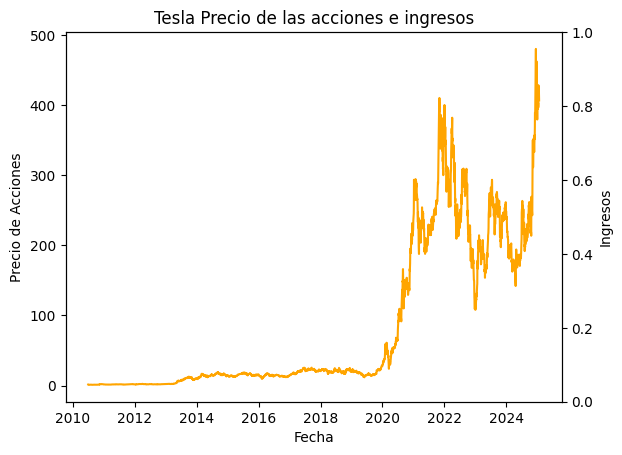

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
def make_graph(stock_data, revenue_data, stock):
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    ax1.set_xlabel('Fecha')
    ax1.set_ylabel('Precio de Acciones', color='black')
    ax2.set_ylabel('Ingresos', color='black')
    ax1.plot(stock_data.index, stock_data['Close'], color='orange')
    plt.title(f'{stock} Precio de las acciones e ingresos')
    plt.show()
make_graph(tesla_data, tesla_revenue_df, 'Tesla')

**Pregunta 6:** Cuadro de mando de acciones e ingresos de GameStop

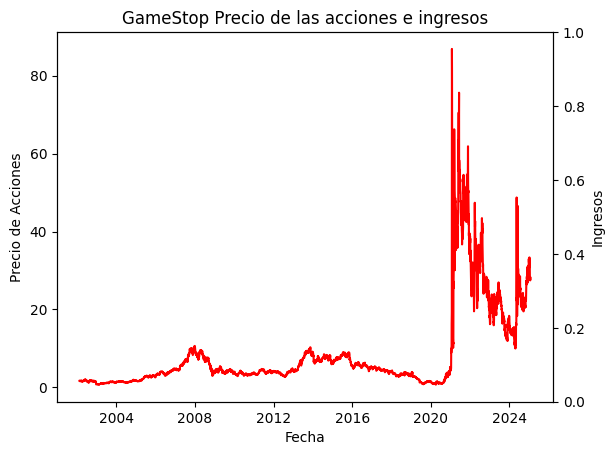

In [12]:
def make_graph(stock_data, revenue_data, stock):
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    ax1.set_xlabel('Fecha')
    ax1.set_ylabel('Precio de Acciones', color='black')
    ax2.set_ylabel('Ingresos', color='black')
    ax1.plot(stock_data.index, stock_data['Close'], color='red')
    plt.title(f'{stock} Precio de las acciones e ingresos')
    plt.show()
make_graph(gamestop_data, gamestop_data_revenue_df, 'GameStop')